## 0. Data and preprocess

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


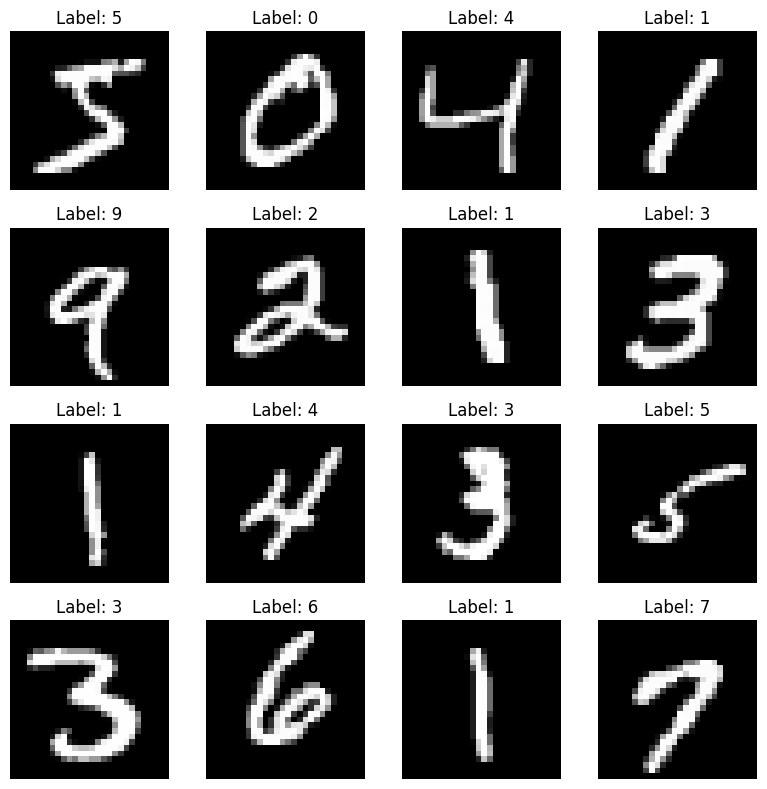

In [3]:
# Plot a sample of the images
num_rows, num_cols = 4, 4  # grid layout for the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')  # hide the axes ticks
    ax.set_title(f"Label: {train_labels[i]}")

plt.tight_layout()
plt.show()

In [4]:
# Normalize the images to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Flatten the images to 1D vectors of 784 elements
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


## 1. Network configuration and Model training

In [7]:
import tensorflow as tf
from tensorflow import keras


In [8]:
model_with_dropout = keras.models.Sequential([
    keras.layers.Dense(128, activation = 'relu', input_shape = (784,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')

])

In [10]:
## Compile the model
model_with_dropout.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
# Train the model
history_with_dropout = model_with_dropout.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.5582 - accuracy: 0.8342 - val_loss: 0.2364 - val_accuracy: 0.9346
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2901 - accuracy: 0.9172 - val_loss: 0.1782 - val_accuracy: 0.9515
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2401 - accuracy: 0.9314 - val_loss: 0.1532 - val_accuracy: 0.9571
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2060 - accuracy: 0.9396 - val_loss: 0.1329 - val_accuracy: 0.9627
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1828 - accuracy: 0.9467 - val_loss: 0.1218 - val_accuracy: 0.9657
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1683 - accuracy: 0.9487 - val_loss: 0.1137 - val_accuracy: 0.9670
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1583 - accuracy: 0.9536 - val_loss: 0.1087 - val_accuracy: 0.9688
Epoch

## 2. Evaluation and Visualization

In [12]:
# Evaluate the model
test_loss_with_dropout, test_accuracy_with_dropout = model_with_dropout.evaluate(test_images, test_labels)


313/313 [==============================] - 2s 6ms/step - loss: 0.0921 - accuracy: 0.9704


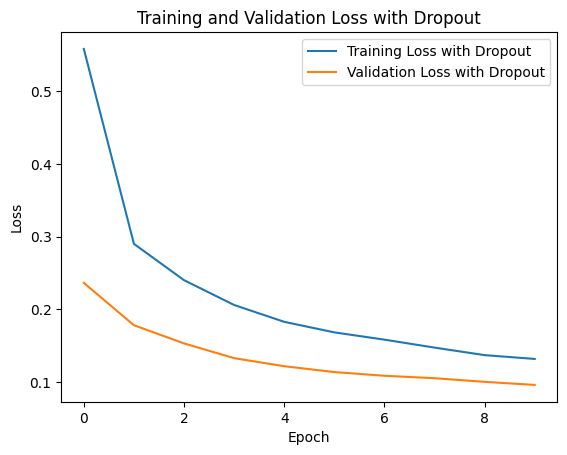

In [13]:
# Plot training and validation loss curves
plt.plot(history_with_dropout.history['loss'], label='Training Loss with Dropout')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss with Dropout')
plt.title('Training and Validation Loss with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 3. Analysis


- **Training Loss:**
  - With dropout, the training loss curve is higher and descends more slowly as the epochs increase.
  - This slower decline is due to the dropout since it adds noise by randomly deactivating neurons, thus preventing quick overfitting and a gradual decrease of the loss function.

- **Validation Loss:**
  - The validation loss is close to the training loss. There is an increase in the gap between the training and validation loss with dropout, showing that the model is generalizing more effectively than before.

- **Effectiveness of Dropout:**
  - The validation loss is almost the same with or without dropout.
  - However, we can observe that without dropout, the model was able to achieve a better training loss that is lower training loss and approached lower than 0.05.
  - However, with dropout, we can see that the model's training loss becomes constant or plateaus as it approaches close to 0.1.
